In [2]:
# minist digit recoginition
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
# load mnist hand written dataset

#transform data
transform=torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0,),(128,)),
])
train=torchvision.datasets.MNIST(root='data',train=True,download=True,transform=transform)
test=torchvision.datasets.MNIST(root='data',train=False,download=True,transform=transform)


In [4]:
# batch the dataset
train_loader=DataLoader(train,shuffle=True,batch_size=100)
test_loader=DataLoader(test,shuffle=False,batch_size=100)


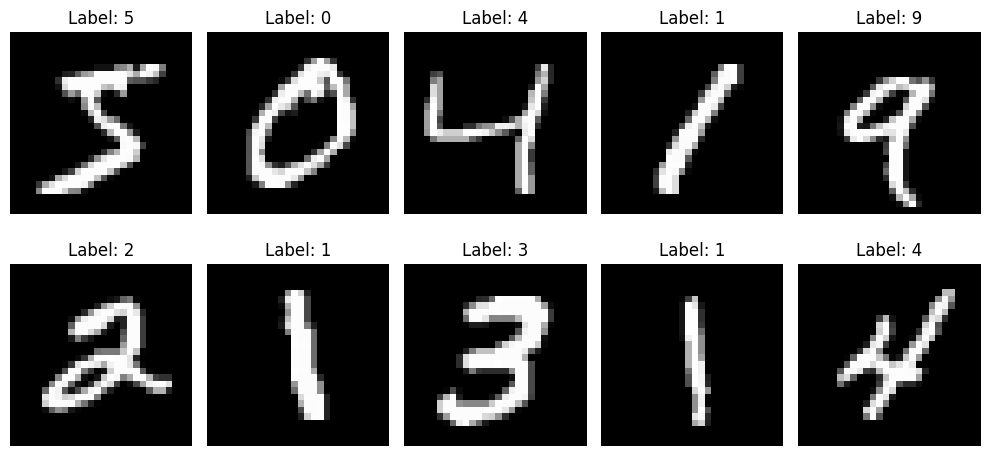

In [5]:
# Create a figure and axes
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Plot some images
for i, ax in enumerate(axes.flat):
    image, label = train[i]
    image = image[0]  # Since MNIST images are single-channel (grayscale)
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
# define model
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    #layer 1
    self.conv1=nn.Conv2d(1,6,kernel_size=5,stride=1,padding=2)
    self.act1=nn.Tanh()
    self.pooling1=nn.AvgPool2d(kernel_size=2,stride=2)

    #layer2
    self.conv2=nn.Conv2d(6,16,kernel_size=5,stride=1,padding=0)
    self.act2=nn.Tanh()
    self.pooling2=nn.AvgPool2d(kernel_size=2,stride=2)

    #leyer3
    self.conv3=nn.Conv2d(16,120,kernel_size=5,stride=1,padding=0)
    self.act3=nn.Tanh()

    #flatten the feature map

    self.flat=nn.Flatten()
    #linear layer
    self.linear1=nn.Linear(1*1*120,84)
    self.act4=nn.Tanh()
    self.linear2=nn.Linear(84,10)

  # forward pass
  def forward(self,input):

    #input->1*128*128,output->6*128*128
    input=self.act1(self.conv1(input))

    # averagepooling, input->6*128*128,output->6*14*14
    input=self.pooling1(input)

    #input->6*14*14,output->16*10*10
    input=self.act2(self.conv2(input))

    #averagepooling, input->16*10*10,output->16*5*5
    input=self.pooling2(input)

    #input->16*5*5,output->120*1*1
    input=self.act3(self.conv3(input))

    # linear layer1 ,input ->120*1*1,output->85
    input=self.act4(self.linear1(self.flat(input)))

    #linear layer2 ,input->85,output->10
    input =self.linear2(input)

    return input

In [11]:
# model,object of CNN class 
model=CNN()
# model.forward()
# print(list(model.parameters()))
for name,params in model.named_parameters():
  print(f"name {name} parameters{params.shape}")


#optimizer ,to optimize the learnable parapemters
optimizer=optim.Adam(model.parameters(),lr=0.01)

#objective function to caulculate the loss b/w predicted output and actual label
Loss=nn.CrossEntropyLoss()
# number of times model get train
epochs=10

name conv1.weight parameterstorch.Size([6, 1, 5, 5])
name conv1.bias parameterstorch.Size([6])
name conv2.weight parameterstorch.Size([16, 6, 5, 5])
name conv2.bias parameterstorch.Size([16])
name conv3.weight parameterstorch.Size([120, 16, 5, 5])
name conv3.bias parameterstorch.Size([120])
name linear1.weight parameterstorch.Size([84, 120])
name linear1.bias parameterstorch.Size([84])
name linear2.weight parameterstorch.Size([10, 84])
name linear2.bias parameterstorch.Size([10])


In [12]:
#train the model

#training Loop
for epoch in range(epochs):
    # this will intialize the model's parameters and indicate that model is training mode
    model.train()

    # number of example of in batch ,it updates parameters on small batch of example rather than on whole examaples
    for X_train,y_train in train_loader:

      # predicted value of model 
      y_pred=model(X_train)

      # caculate loss between predicted value and actual value
      loss=Loss(y_pred,y_train)

      # to prevent the gradient of parameters to being accumulated of gradients
      optimizer.zero_grad()

      # this calculate gradient of parameters wrt to loss using backpropagation algorithm
      loss.backward()

      # updates the weight along thr direction of reducing  loss 
      optimizer.step()

    ## validation mode is on in this mode gradient of parameters will not change,also dropout the connections if needed
    model.eval()

    # to store the accuracy of model
    accuracy=0

    # number of test examples
    count=0

    # dataloader to bind the X_test and y_test
    for X_test,y_test in test_loader:

      # predict the value on given test data
      y_pred=model(X_test)

      # calculate accuracy of model
      accuracy+=(torch.argmax(y_pred,1)==y_test).float().sum()
      count+=len(y_test)

    accuracy=accuracy/count # accuracy of model on test dataset

    print(f"epoch :{epoch}| accuracy:{accuracy*100:.2f} | loss:{loss :.2f}")





epoch :0| accuracy:94.13 | loss:0.09
epoch :1| accuracy:94.73 | loss:0.02
epoch :2| accuracy:95.09 | loss:0.20
epoch :3| accuracy:95.89 | loss:0.23
epoch :4| accuracy:95.77 | loss:0.16
epoch :5| accuracy:94.49 | loss:0.10
epoch :6| accuracy:94.86 | loss:0.27
epoch :7| accuracy:95.58 | loss:0.11
epoch :8| accuracy:95.08 | loss:0.27
epoch :9| accuracy:94.96 | loss:0.25


In [13]:
# save the model
torch.save(model.state_dict(), "model.pth")

In [23]:
loaded_model=CNN()

In [24]:
# testing on new iamges
import cv2

# load the model
loaded_model.load_state_dict(torch.load('/Users/vishalroy/MNIST_DIGIT_CLASSIFIER/model.pth'))
loaded_model.eval()

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (act1): Tanh()
  (pooling1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (act2): Tanh()
  (pooling2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (act3): Tanh()
  (flat): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=120, out_features=84, bias=True)
  (act4): Tanh()
  (linear2): Linear(in_features=84, out_features=10, bias=True)
)

In [16]:
# preproccsing image before evaluating
def process(img_path):
  img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)

  #resize the image to 28*28
  img=cv2.resize(img,(28,28))
  # # normalize the iamge

  # #add batch dimension
  # img=img.reshape(1,28,28,1)
  return img

In [17]:
# test the model
test_img=process('/Users/vishalroy/MNIST_DIGIT_CLASSIFIER/images/img_41790.jpg')

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0,), (128,))
])

In [18]:
#tranform new images into required format
test_img=transform(test_img)

In [19]:
# add batch dimension
test_img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [20]:
# predict the number 
model.eval()

with torch.no_grad():
  prediction=model(test_img.unsqueeze(0))

predicted_class = torch.argmax(prediction, dim=1).item()

In [21]:
print(f"predicted number :{predicted_class}")

predicted number :0
